## <a name = 'p9'> Data Training </a>

To train the OpenCV recognizer using the dataset and save the trained model as a .yml file, you can follow these steps:

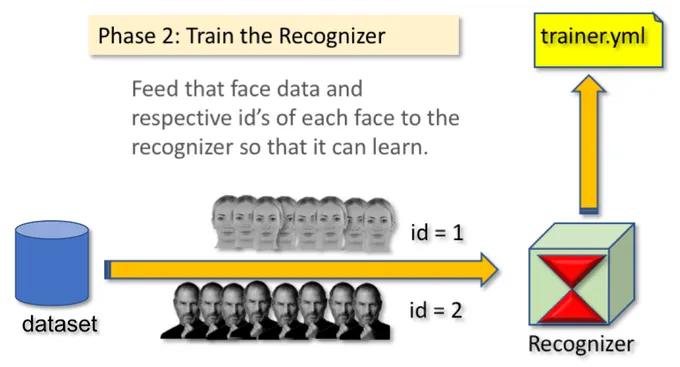

In [35]:
# Importing the necessary library
import cv2
import os
import numpy as np
from PIL import Image

In [ ]:
# Path for face image database
path = 'C:Users/Mintu Adak/Desktop/Face Detection App/dataset/'

# Create LBPH Face Recognizer
recognizer = cv2.face.LBPHFaceRecognizer_create()

# Load Haar Cascade classifier for face detection
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Function to retrieve image and their corresponding labels
def getImagesAndLabels(path):
    # Retrieve file paths of images in the given directory
    imagePaths =[os.path.join(path, f) for f in os.listdir(path)]
    faceSamples =[]
    ids = []
    for imagePath in imagePaths:
        # Open image , convert to grayscale
        PIL_img = Image.open(imagePath).convert('L')
        img_numpy = np.array(PIL_img,'uint8')
        
        # Extract the label(ID) from the file name 
        id = int(os.path.split(imagePath)[-1].split(".")[1])
        
        # Detect faces in the image
        faces = detector.detectMultiScale(img_numpy)
        for(x , y , w , h) in faces:
            # Store the detected face region and its label
            faceSamples.append(img_numpy[y:y+h , x:x+w])
            ids.append(id)
        return faceSamples , ids 

    print("\n [INFO] Training faces. It will take a few seconds. Wait ...")
    
    # Retrieve images and labels for training 
    faces, ids = getImageAndLabels(path)
    
    # Train the recognizer using the retrieved data 
    recognizer.train(faces, np.array(ids))
    
    # Save the trained model to a file
    recognizer.write('C:/Users/Mintu Adak/Desktop/Face Detection App/trainer/trainer.yml') 
    
    # Print the number of unique faces trained
    
    print("\n [INFO] faces trained. Exiting Program".format(len(np.unique(ids))))
    